In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [34]:
df = pd.read_csv('college_data.csv')

In [35]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### EDA

In [36]:
df.shape

(777, 18)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
private        777 non-null object
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f_undergrad    777 non-null int64
p_undergrad    777 non-null int64
outstate       777 non-null int64
room_board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s_f_ratio      777 non-null float64
perc_alumni    777 non-null int64
expend         777 non-null int64
grad_rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
f_undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
p_undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
room_board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [39]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

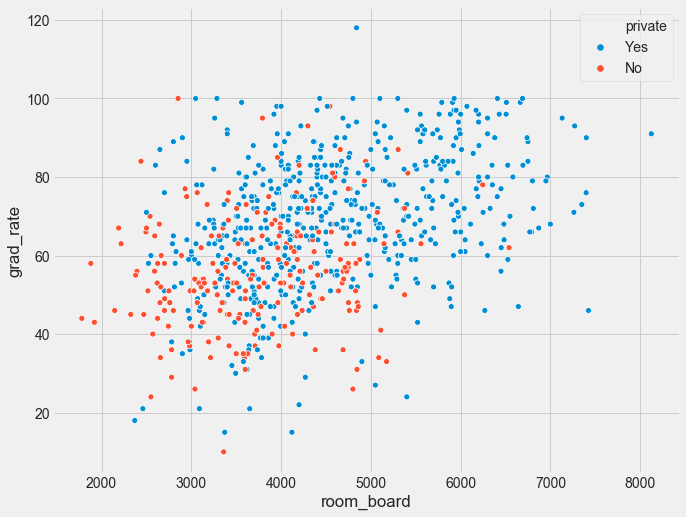

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot('room_board','grad_rate',data=df,hue="private")

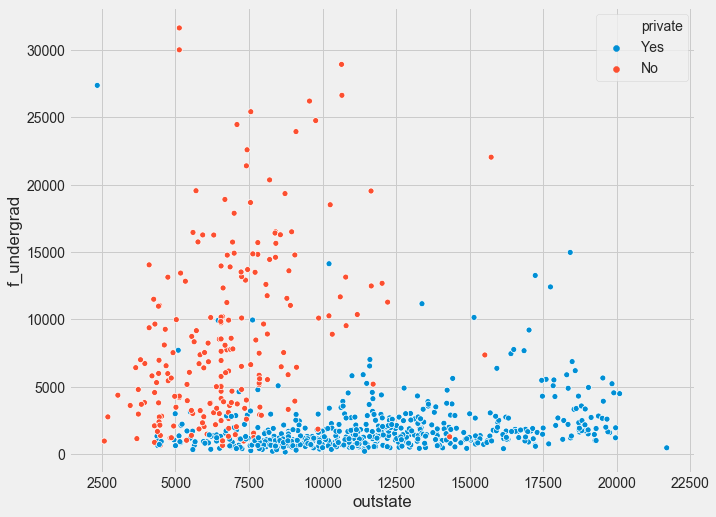

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot('outstate','f_undergrad',data=df,hue="private")

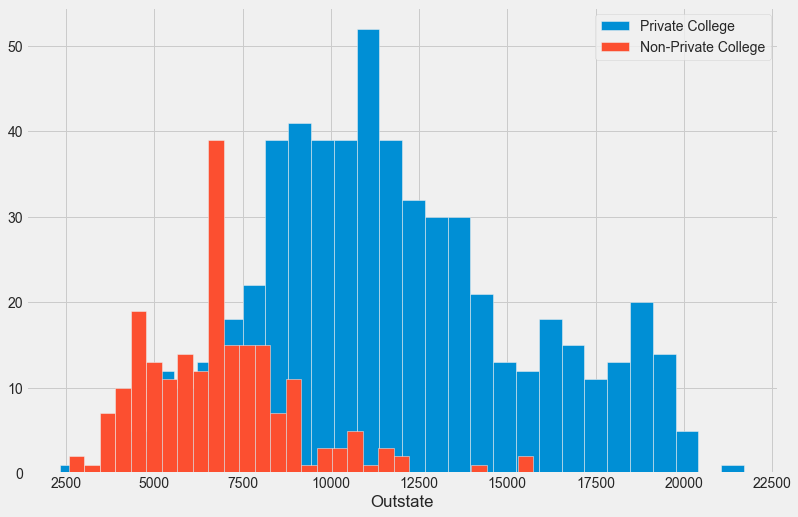

In [42]:
plt.figure(figsize=(12,8))

df.loc[df.private == 'Yes','outstate'].hist(label='Private College',bins=30)
df.loc[df.private == 'No','outstate'].hist(label="Non-Private College",bins=30)

plt.xlabel('Outstate')
plt.legend()

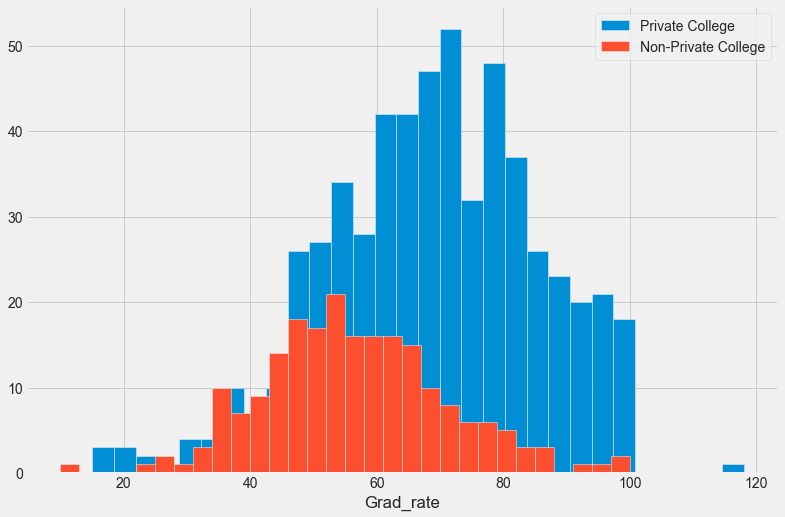

In [45]:
plt.figure(figsize=(12,8))
df.loc[df.private == 'Yes','grad_rate'].hist(label="Private College",bins=30)
df.loc[df.private =='No','grad_rate'].hist(label="Non-Private College",bins=30)

plt.xlabel('Grad_rate')
plt.legend()

Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [46]:
df.loc[df.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.

In [47]:
df.loc[df.grad_rate > 100,'grad_rate'] = 100

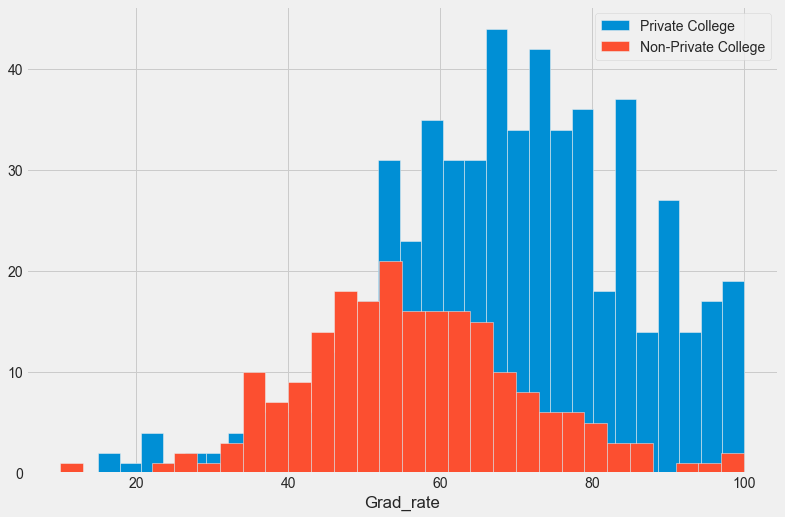

In [48]:
plt.figure(figsize=(12,8))

df.loc[df.private == 'Yes','grad_rate'].hist(label='Private College',bins=30)
df.loc[df.private=='No','grad_rate'].hist(label='Non-Private College',bins=30)

plt.xlabel('Grad_rate')
plt.legend()

### Train and Test Split

In [49]:
df['private'].value_counts()

Yes    565
No     212
Name: private, dtype: int64

### Standarize the Variables

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['private'],axis=1)
y = df['private']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Predictions and Evalution

Lets evaluate our KNN Model!

In [67]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

def evaluate(model,X_train,X_test,y_train,y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
evaluate(knn_clf,X_train,X_test,y_train,y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[148   0]
 [ 19 376]]
ACCURACY SCORE:
0.9650
CLASSIFICATION REPORT:
                   No         Yes  accuracy   macro avg  weighted avg
f1-score     0.939683    0.975357  0.965009    0.957520      0.965633
precision    0.886228    1.000000  0.965009    0.943114      0.968990
recall       1.000000    0.951899  0.965009    0.975949      0.965009
support    148.000000  395.000000  0.965009  543.000000    543.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 55   9]
 [ 21 149]]
ACCURACY SCORE:
0.8718
CLASSIFICATION REPORT:
                  No         Yes  accuracy   macro avg  weighted avg
f1-score    0.785714    0.908537  0.871795    0.847125      0.874944
precision   0.723684    0.943038  0.871795    0.833361      0.883044
recall      0.859375    0.876471  0.871795    0.867923      0.871795
support    64.000000  170.000000  0.871795  234.000000    234.000000


### Choosing a K-value
Let's go ahead and use the elbow method to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. 

In [70]:
scores = []

for n in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    scores.append(score)

Now create the following plot using the information from your for loop.

Text(0.5, 0, 'K Nearest Neighbors')

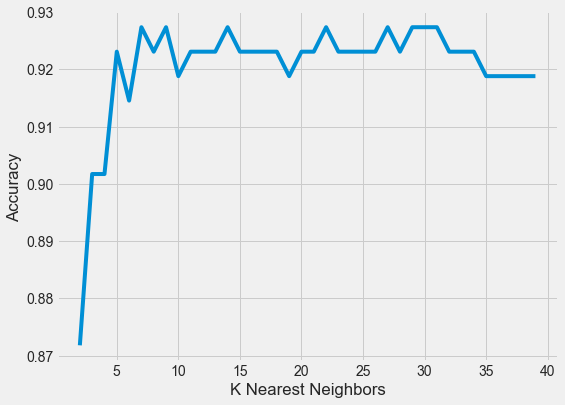

In [71]:
plt.figure(figsize=(8,6))
plt.plot(range(2,40),scores)
plt.ylabel("Accuracy")
plt.xlabel("K Nearest Neighbors")

### Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)

evaluate(knn_clf,X_train,X_test,y_train,y_test)